In [354]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.style as style
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [355]:
x = [1,2,3,4,5,6,7]
y = [3.5, 3.8, 4.2, 4.5, 5, 5.5, 7]

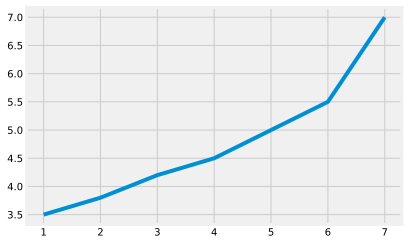

In [356]:
plt.plot(x, y)
plt.show()

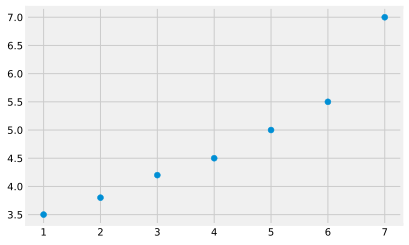

In [357]:
plt.scatter(x, y)
plt.show()

In [358]:
t = np.linspace(0, 10, 51)
f = np.cos(t)

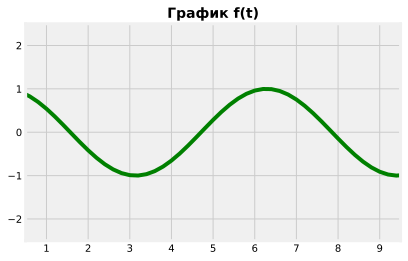

In [359]:
plt.plot (t,f, color='green')
plt.title("График f(t)",fontweight='bold', fontsize=14)
plt.axis([0.5,9.5, -2.5, 2.5])
plt.show()

In [360]:
x = np.linspace(-3, 3, 51)
y1 = x**2
y2 = 2*x + 0.5
y3 = -3*x - 1.5
y4 = np.sin(x)

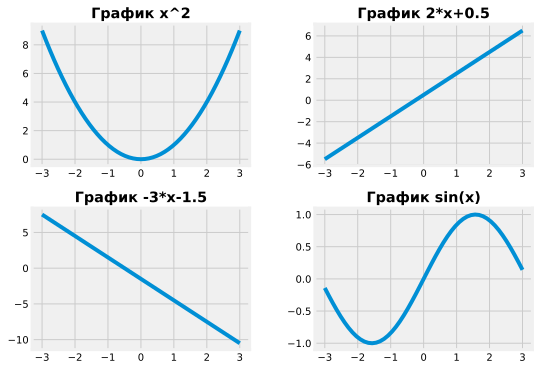

In [361]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax1,ax2,ax3,ax4 = ax.flatten()
ax1.plot(x, y1)
ax1.set_title("График x^2", fontweight='bold')
ax2.plot(x, y2)
ax2.set_title("График 2*x+0.5", fontweight='bold')
ax3.plot(x, y3)
ax3.set_title("График -3*x-1.5", fontweight='bold')
ax4.plot(x, y4)
ax4.set_title("График sin(x)", fontweight='bold')
fig.set_size_inches(8, 6)
fig.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

In [362]:
fraud = pd.read_csv('creditcard.csv')
style.use('fivethirtyeight')

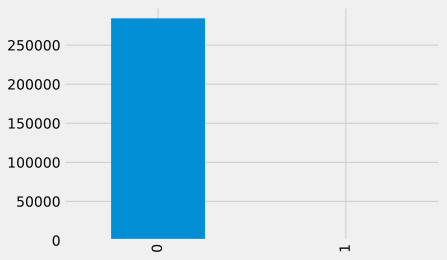

In [363]:
fraud.Class.value_counts().plot(kind='bar')
plt.show()

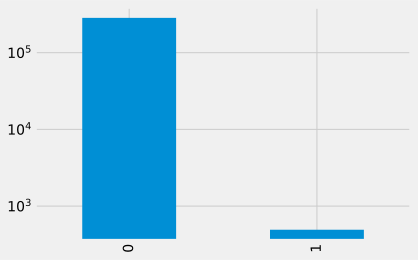

In [364]:
fraud.Class.value_counts().plot(kind='bar')
plt.yscale(value="log")
plt.show()

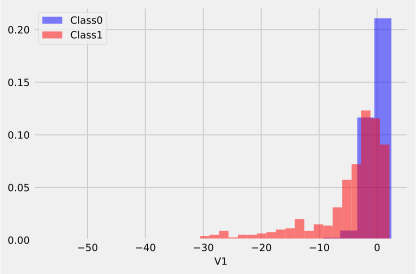

In [365]:
#Сделал цвет по классу0 не серым, а голубым, т. к. серый сливается с красным, по крайне мере, на моем мониторе
class0 = fraud.query('Class==0').V1
class1 = fraud.query('Class==1').V1
params = dict(density=True, bins=20, alpha=0.5)
class0.hist(**params,color='blue',label='Class0')
class1.hist(**params,color='red',label='Class1')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('V1', fontsize=10)
plt.legend(fontsize=10)
plt.show()

In [366]:
a=np.arange(12,24)


In [367]:
a.reshape(2,6)
a.reshape(3,4)
a.reshape(4,3)
a.reshape(6,2)
a.reshape(1,12)
a.reshape(12,1).ndim

2

In [368]:
a.reshape(2,-1)
a.reshape(3,-1)
a.reshape(4,-1)
a.reshape(-1,2)
a.reshape(-1,12).shape

(1, 12)

Можно ли массив Numpy, состоящий из одного столбца и 12 строк, назвать одномерным? Команда a.reshape(12,1).ndim
выдает результат - 2, таким образом, нельзя.

In [369]:
rd=np.random.randn(3,4)
rd.flatten()

array([-0.90802408, -1.4123037 ,  1.46564877, -0.2257763 ,  0.0675282 ,
       -1.42474819, -0.54438272,  0.11092259, -1.15099358,  0.37569802,
       -0.60063869, -0.29169375])

In [370]:
a = np.arange(20,0,-2)
a

array([20, 18, 16, 14, 12, 10,  8,  6,  4,  2])

In [371]:
b = np.arange(20,1,-2).reshape(1,10)
b

array([[20, 18, 16, 14, 12, 10,  8,  6,  4,  2]])

Массив а одномерный, а массив b многомерный (2 измерения)

In [372]:
a = np.zeros((2,2), dtype='int8')
b = np.ones((3,2), dtype='int8')
с = np.concatenate((a, b))
c

array([[ 6,  3, 12, 14],
       [10,  7, 12,  4],
       [ 6,  9,  2,  6],
       [10, 10,  7,  4]])

In [373]:
a = np.arange(12)
A = a.reshape(4,3)
At = A.T
B = np.dot(A,At)
B.shape

(4, 4)

In [374]:
np.linalg.inv(B)

LinAlgError: Singular matrix

Вычислить обратную матрицу невозможно, так как матрица является сингулярной.

In [ ]:
np.random.seed(42)
c = np.random.randint(0,16,16)

In [ ]:
C = c.reshape(4,4)
C

In [375]:
D = C*10 + B

In [377]:
D_inv=np.linalg.inv(D)
D_inv

array([[ 0.00935396,  0.04486532,  0.05897517, -0.07286055],
       [-0.01503577, -0.00122896, -0.00192971,  0.00967873],
       [-0.00356692, -0.01782828, -0.04152146,  0.04326178],
       [ 0.00909091, -0.00181818,  0.01272727, -0.01090909]])

In [ ]:
np.linalg.matrix_rank(D)

In [ ]:
np.linalg.det(D)

In [382]:

D_inv[D_inv > 0] = 1
D_inv[D_inv < 0] = 0
D_inv

array([[1., 1., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 1., 0.]])

In [384]:
E = np.where(D_inv == 1, B, C)
E

array([[  5,  14,  23,  14],
       [ 10,   7,  12, 122],
       [  6,   9,   2, 212],
       [ 32,  10, 212,   4]])